<a href="https://colab.research.google.com/github/ssahu912/caddy-gesture-identification/blob/main/caddy_gestures_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1FdIwG5tk-mNrei-SVpC6SEbi9VAhL-pY')

     |████████████████████████████████| 71kB 7.7MB/s 


In [2]:
!pip install jovian --upgrade --quiet

In [3]:
project_name='caddy-gestures-course-project'

# Exploring CADDY Underwater Gestures Dataset
### Human-Robot Interaction (HRI) for Diver and AUVs activities
This is an open access dataset distributed under the Creative Commons Attribution License which permits unrestricted use, distribution, and reproduction in any medium, provided the original work is properly cited (CC BY 4.0).
<p>
The dataset can be downloaded from the <a href="http://www.caddian.eu//assets/caddy-gestures-TMP/CADDY_gestures_complete_v2_release.zip">link</a>.
<p>
Choosing this dataset of hand gestures used by divers underwater to provide instructtions in 8 different scenarios. The scenarios involved in this dataset are as follows: 
<table><tr>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/biograd-A/true_positives/raw/biograd-A_00162_left.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/biograd-B/true_positives/raw/biograd-B_00032_right.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/biograd-C/true_positives/raw/biograd-C_00098_right.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/brodarski-A/true_positives/raw/brodarski-A_00018_right.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr>
<td>BioGrad-A</td>
<td>BioGrad-B</td>
<td>BioGrad-C</td>
<td>Brodarski-A</td>
</tr>
<tr>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/brodarski-B/true_positives/raw/brodarski-B_00029_right.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/brodarski-C/true_positives/raw/brodarski-C_00006_left.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/brodarski-D/true_positives/raw/brodarski-D_00032_right.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="http://www.caddian.eu//assets/caddy-gestures-TMP/genova-A/true_positives/raw/genova-A_00032_right.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr>
</tr>
<td>Brodarski-B</td>
<td>Brodarski-C</td>
<td>Brodarski-D</td>
<td>Genova-A</td>
</tr>
</table>
It is a classification type problem where given an image of the person with the gesture the machine will identify the gesture meaning in multiple scenarios.


If you wish to upload the data on the drive then use this code to mount the drive so that it is available to use.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import torch
import torchvision
import zipfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

If you wish to download the data set and load it while running the notebook and do not want ot upload it to your drive please uncomment the below cell and execute. 

In [150]:
# # Dowload the dataset
dataset_url = "http://www.caddian.eu//assets/caddy-gestures-TMP/CADDY_gestures_complete_v2_release.zip"
# download_url(dataset_url, '.')
# # Extract from downloaded archive
# with zipfile.ZipFile('./CADDY_gestures_complete_v2_release.zip', 'r') as zip_ref:
#     zip_ref.extractall('./data')

In [7]:
# Extract from drive archive
with zipfile.ZipFile('./drive/MyDrive/CADDY_gestures_complete_v2_release.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

## Data Analysis

Let's explore the data!

Looking at the folder structure we see that we have 8 folders for 8 scenarios which contain raw images of multiple gestures captured by the left and right stereo.
<p>
The folder structure of the data is something like this:
<p>
data => biograd-A => true_positives => raw => image1, image2 ... imageN

Let's take a look what's inside the the csv files and how are they structured!!
(We'll be looking at the true positives only for the scope of the project.)

In [8]:
# Importing required EDA tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
dataFromCSV = pd.read_csv('./data/CADDY_gestures_complete_v2_release/CADDY_gestures_all_true_positives_release_v2.csv', index_col='index')
dataFromCSV.head(10)

,scenario,stereo left,stereo right,label name,label id,roi left,roi right,synthetic,iqa_mdm_entropy,iqa_mdm_d,iqa_mdm_dcomp,distortion,param 1,param 2
index,,,,,,,,,,,,,,
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",0,6.971026,0.957653,0.902,NaN,NaN,NaN
1,biograd-A,/biograd-A/true_positives/blurred/dir_00/biogr...,/biograd-A/true_positives/blurred/dir_00/biogr...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,blur,7,NaN
2,biograd-A,/biograd-A/true_positives/blurred/dir_01/biogr...,/biograd-A/true_positives/blurred/dir_01/biogr...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,blur,11,NaN
3,biograd-A,/biograd-A/true_positives/blurred/dir_02/biogr...,/biograd-A/true_positives/blurred/dir_02/biogr...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,blur,15,NaN
4,biograd-A,/biograd-A/true_positives/noisy/dir_00/biograd...,/biograd-A/true_positives/noisy/dir_00/biograd...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,channel noise,5,NaN
5,biograd-A,/biograd-A/true_positives/noisy/dir_01/biograd...,/biograd-A/true_positives/noisy/dir_01/biograd...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,channel noise,10,NaN
6,biograd-A,/biograd-A/true_positives/low_contrast/dir_00/...,/biograd-A/true_positives/low_contrast/dir_00/...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,low contrast,0.8,NaN
7,biograd-A,/biograd-A/true_positives/low_contrast/dir_01/...,/biograd-A/true_positives/low_contrast/dir_01/...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,low contrast,0.6,NaN
8,biograd-A,/biograd-A/true_positives/compressed/dir_00/bi...,/biograd-A/true_positives/compressed/dir_00/bi...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",1,NaN,NaN,NaN,compression,jpeg,80.0


In [10]:
dataFromCSV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92390 entries, 0 to 92389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scenario         92390 non-null  object 
 1   stereo left      92390 non-null  object 
 2   stereo right     92390 non-null  object 
 3   label name       92390 non-null  object 
 4   label id         92390 non-null  int64  
 5   roi left         91790 non-null  object 
 6   roi right        91440 non-null  object 
 7   synthetic        92390 non-null  int64  
 8   iqa_mdm_entropy  9239 non-null   float64
 9   iqa_mdm_d        9239 non-null   float64
 10  iqa_mdm_dcomp    9239 non-null   float64
 11  distortion       83151 non-null  object 
 12  param 1          83151 non-null  object 
 13  param 2          18478 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 10.6+ MB


In [11]:
dataFromCSV.columns

Index(['scenario', 'stereo left', 'stereo right', 'label name', 'label id',
       'roi left', 'roi right', 'synthetic', 'iqa_mdm_entropy', 'iqa_mdm_d',
       'iqa_mdm_dcomp', 'distortion', 'param 1', 'param 2'],
      dtype='object')

For the scope of the project where we are classifying the gestures we would only need the label name of the the image from the CSV.
<p>
Also a point worth noting is not all the images are present in the data set as mentioned in CSV. If we look closely inside each and every scenario there are 2 folders "true_positives" and "true_neagtives", and inside each of them there's only one folder called "raw". This means that only raw images are present and not the distorted ones.
<p>
Hence we'll be working on the raw set of images which are around 18,400 which is a pretty decent data size.

Let's idenetify how many different gestures are available in the dataset.

In [12]:
classes = dataFromCSV["label name"].unique()
classes

array(['num_delimiter', 'five', 'end_comm', 'start_comm', 'one', 'two',
       'three', 'four', 'up', 'down', 'backwards', 'mosaic', 'boat',
       'carry', 'here', 'photo'], dtype=object)

In [13]:
len(classes)

16

We see that we have 16 unique classes hence we have to categorize the images into 16 classes.(output)

### Data Cleaning 

As we saw earlier we have a lot of missing and junk data which we need to filter out, or we can say we need to extract the useful data from the CSV and map them with the images.
<p>
So let's create another CSV which can help map the raw data image paths with their labels.


In [16]:
# removing distorted image data from csv
dataset = dataFromCSV.loc[dataFromCSV.distortion.isnull()]
dataset.head()

,scenario,stereo left,stereo right,label name,label id,roi left,roi right,synthetic,iqa_mdm_entropy,iqa_mdm_d,iqa_mdm_dcomp,distortion,param 1,param 2
index,,,,,,,,,,,,,,
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10,"[237,236,54,65]","[155,236,54,65]",0,6.971026,0.957653,0.902000,NaN,NaN,NaN
10,biograd-A,/biograd-A/true_positives/raw/biograd-A_00001_...,/biograd-A/true_positives/raw/biograd-A_00001_...,num_delimiter,10,"[230,230,61,79]","[147,230,61,79]",0,6.977803,0.958442,0.885512,NaN,NaN,NaN
20,biograd-A,/biograd-A/true_positives/raw/biograd-A_00002_...,/biograd-A/true_positives/raw/biograd-A_00002_...,num_delimiter,10,"[222,230,72,75]","[139,230,72,75]",0,6.930135,0.958565,0.885733,NaN,NaN,NaN
30,biograd-A,/biograd-A/true_positives/raw/biograd-A_00003_...,/biograd-A/true_positives/raw/biograd-A_00003_...,num_delimiter,10,"[231,231,62,83]","[148,231,62,83]",0,6.948746,0.958243,0.885593,NaN,NaN,NaN
40,biograd-A,/biograd-A/true_positives/raw/biograd-A_00004_...,/biograd-A/true_positives/raw/biograd-A_00004_...,num_delimiter,10,"[222,219,70,76]","[138,219,70,76]",0,7.175039,0.955913,0.875217,NaN,NaN,NaN


In [17]:
# removing irrelevant columns from the data
dataset = dataset.drop(labels=['roi left', 'roi right', 'synthetic', 'iqa_mdm_entropy', 'iqa_mdm_d',
                                   'iqa_mdm_dcomp', 'distortion', 'param 1', 'param 2'], axis=1)
dataset.head()

,scenario,stereo left,stereo right,label name,label id
index,,,,,
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10
10,biograd-A,/biograd-A/true_positives/raw/biograd-A_00001_...,/biograd-A/true_positives/raw/biograd-A_00001_...,num_delimiter,10
20,biograd-A,/biograd-A/true_positives/raw/biograd-A_00002_...,/biograd-A/true_positives/raw/biograd-A_00002_...,num_delimiter,10
30,biograd-A,/biograd-A/true_positives/raw/biograd-A_00003_...,/biograd-A/true_positives/raw/biograd-A_00003_...,num_delimiter,10
40,biograd-A,/biograd-A/true_positives/raw/biograd-A_00004_...,/biograd-A/true_positives/raw/biograd-A_00004_...,num_delimiter,10


Since we have images from 2 stereos left and right which have almost similar image we would like to negate the difference between the left and right stereo. Hence altering the CSV to increase the size of Dataset.

In [22]:
dataset_right_stereo = dataset.drop(labels = ["stereo left"],axis=1)
dataset_right_stereo.rename(columns = {"stereo right": 'stereo'}, inplace = True)
dataset_right_stereo

,scenario,stereo,label name,label id
index,,,,
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10
10,biograd-A,/biograd-A/true_positives/raw/biograd-A_00001_...,num_delimiter,10
20,biograd-A,/biograd-A/true_positives/raw/biograd-A_00002_...,num_delimiter,10
30,biograd-A,/biograd-A/true_positives/raw/biograd-A_00003_...,num_delimiter,10
40,biograd-A,/biograd-A/true_positives/raw/biograd-A_00004_...,num_delimiter,10
...,...,...,...,...
92340,genova-A,/genova-A/true_positives/raw/genova-A_03315_ri...,end_comm,1
92350,genova-A,/genova-A/true_positives/raw/genova-A_03316_ri...,end_comm,1
92360,genova-A,/genova-A/true_positives/raw/genova-A_03317_ri...,end_comm,1


In [23]:
dataset_left_stereo = dataset.drop(labels = ["stereo right"],axis=1)
dataset_left_stereo.rename(columns = {"stereo left": 'stereo'}, inplace = True)
dataset_left_stereo

,scenario,stereo,label name,label id
index,,,,
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10
10,biograd-A,/biograd-A/true_positives/raw/biograd-A_00001_...,num_delimiter,10
20,biograd-A,/biograd-A/true_positives/raw/biograd-A_00002_...,num_delimiter,10
30,biograd-A,/biograd-A/true_positives/raw/biograd-A_00003_...,num_delimiter,10
40,biograd-A,/biograd-A/true_positives/raw/biograd-A_00004_...,num_delimiter,10
...,...,...,...,...
92340,genova-A,/genova-A/true_positives/raw/genova-A_03315_le...,end_comm,1
92350,genova-A,/genova-A/true_positives/raw/genova-A_03316_le...,end_comm,1
92360,genova-A,/genova-A/true_positives/raw/genova-A_03317_le...,end_comm,1


In [26]:
# Concatenate the two dataframes created above 
dataset_v1 = pd.concat([dataset_left_stereo,dataset_right_stereo], ignore_index=True)
dataset_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18478 entries, 0 to 18477
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   scenario    18478 non-null  object
 1   stereo      18478 non-null  object
 2   label name  18478 non-null  object
 3   label id    18478 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 577.6+ KB


In [27]:
dataset_v1.head()

,scenario,stereo,label name,label id
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10
1,biograd-A,/biograd-A/true_positives/raw/biograd-A_00001_...,num_delimiter,10
2,biograd-A,/biograd-A/true_positives/raw/biograd-A_00002_...,num_delimiter,10
3,biograd-A,/biograd-A/true_positives/raw/biograd-A_00003_...,num_delimiter,10
4,biograd-A,/biograd-A/true_positives/raw/biograd-A_00004_...,num_delimiter,10


As we can see in the output of the above cell we can say that the stereo column contains the path to image and the label name contains the information of the gesture performed.
<p>
So let's rename the stereo column to imagePath

In [28]:
dataset_v1.rename(columns={"stereo":"imagePath"},inplace=True)
dataset_v1

,scenario,imagePath,label name,label id
0,biograd-A,/biograd-A/true_positives/raw/biograd-A_00000_...,num_delimiter,10
1,biograd-A,/biograd-A/true_positives/raw/biograd-A_00001_...,num_delimiter,10
2,biograd-A,/biograd-A/true_positives/raw/biograd-A_00002_...,num_delimiter,10
3,biograd-A,/biograd-A/true_positives/raw/biograd-A_00003_...,num_delimiter,10
4,biograd-A,/biograd-A/true_positives/raw/biograd-A_00004_...,num_delimiter,10
...,...,...,...,...
18473,genova-A,/genova-A/true_positives/raw/genova-A_03315_ri...,end_comm,1
18474,genova-A,/genova-A/true_positives/raw/genova-A_03316_ri...,end_comm,1
18475,genova-A,/genova-A/true_positives/raw/genova-A_03317_ri...,end_comm,1
18476,genova-A,/genova-A/true_positives/raw/genova-A_03318_ri...,end_comm,1


In [139]:
classes = dataset_v1.filter(items=["label name","label id"])
classes = classes.set_index('label id').to_dict('dict')
classes = classes['label name']
classes

{0: 'start_comm',
 1: 'end_comm',
 2: 'up',
 3: 'down',
 4: 'photo',
 5: 'backwards',
 6: 'carry',
 7: 'boat',
 8: 'here',
 9: 'mosaic',
 10: 'num_delimiter',
 11: 'one',
 12: 'two',
 13: 'three',
 14: 'four',
 15: 'five'}

In [45]:
dataset_v1.to_csv("./drive/MyDrive/Colab Notebooks/caddy-gesture-transformedV1.csv")

In [142]:
!pip install jovian --upgrade --quiet

In [143]:
import jovian

In [152]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/shubham912sahu/caddy-gestures-course-project


'https://jovian.ai/shubham912sahu/caddy-gestures-course-project'

In [113]:
from PIL import Image
from torchvision.transforms import ToTensor
import numpy as np
import random
import io
import os
import pandas as pd
from torch.utils.data import Dataset


class CaddyDataset(Dataset):
    def __init__(self, csv_path, img_dir='./data/CADDY_gestures_complete_v2_release', transform=None):
        """
        Initialize data set as a list of IDs corresponding to each item of data set

        :param img_dir: path to image files as a folder
        :param csv_path: a text file containing names of all of images line by line
        :param transform: apply some transforms like cropping, rotating, etc on input image
        """

        df = pd.read_csv(csv_path)
        self.img_names = df["imagePath"].values
        self.labels = df["label id"].values
        self.csv_path = csv_path
        self.img_dir = img_dir
        self.transform = transform
        self.get_image_selector = False

    def get_image_from_folder(self, name):
        """
        gets a image by a name gathered from file list text file

        :param name: name of targeted image
        :return: a PIL image
        """
        image = Image.open(os.path.join(self.img_dir, name[1:]))
        
        return image

    def __len__(self):
        """
        Return the length of data set using list of IDs

        :return: number of samples in data set
        """
        return len(self.img_names)

    def __getitem__(self, index):
        """
        Generate one item of data set.

        :param index: index of item in IDs list

        :return: a sample of data as a dict
        """
        X = self.get_image_from_folder(self.img_names[index])

        # Get you label here using available pandas functions
        Y = self.labels[index]

        if self.transform is not None:
            X = self.transform(X)
#            Y = self.transform(Y) # if your label is image too - remove if it is number

        sample = {'Image': X,
                  'Label': Y}

        return sample

In [114]:
tensor_dataset = CaddyDataset("./drive/MyDrive/Colab Notebooks/caddy-gesture-transformedV1.csv",
                              img_dir='./data/CADDY_gestures_complete_v2_release',
                              transform=ToTensor())
tensor_dataset[2]

{'Image': tensor([[[0.2275, 0.2431, 0.2353,  ..., 0.0980, 0.1098, 0.1176],
          [0.2235, 0.2353, 0.2314,  ..., 0.1059, 0.1059, 0.1059],
          [0.2275, 0.2314, 0.2392,  ..., 0.1020, 0.1020, 0.1137],
          ...,
          [0.1059, 0.1020, 0.1059,  ..., 0.0745, 0.0784, 0.0745],
          [0.1137, 0.1137, 0.1176,  ..., 0.0745, 0.0784, 0.0745],
          [0.1137, 0.1176, 0.1216,  ..., 0.0824, 0.0863, 0.0784]],
 
         [[0.5333, 0.5529, 0.5451,  ..., 0.3176, 0.3216, 0.3294],
          [0.5373, 0.5451, 0.5412,  ..., 0.3255, 0.3176, 0.3176],
          [0.5373, 0.5412, 0.5490,  ..., 0.3216, 0.3255, 0.3255],
          ...,
          [0.3255, 0.3216, 0.3255,  ..., 0.2627, 0.2588, 0.2549],
          [0.3333, 0.3333, 0.3373,  ..., 0.2627, 0.2588, 0.2549],
          [0.3373, 0.3373, 0.3412,  ..., 0.2706, 0.2667, 0.2588]],
 
         [[0.7843, 0.8118, 0.8039,  ..., 0.5020, 0.5020, 0.5098],
          [0.7843, 0.8039, 0.8000,  ..., 0.5098, 0.4980, 0.4980],
          [0.7961, 0.8000, 0.80

In [120]:
def data_seperator(tensor_data):
  img = tensor_data["Image"]
  label = tensor_data["Label"]
  return {img, label}

In [121]:
print(data_seperator(tensor_dataset[0]))

{tensor([[[0.2353, 0.2431, 0.2510,  ..., 0.1176, 0.1059, 0.1059],
         [0.2431, 0.2431, 0.2510,  ..., 0.1255, 0.1137, 0.1098],
         [0.2314, 0.2353, 0.2431,  ..., 0.1255, 0.1137, 0.1098],
         ...,
         [0.0902, 0.1059, 0.1059,  ..., 0.0824, 0.0824, 0.0784],
         [0.1098, 0.1255, 0.1216,  ..., 0.0863, 0.0784, 0.0784],
         [0.1020, 0.1216, 0.1255,  ..., 0.0824, 0.0745, 0.0745]],

        [[0.5490, 0.5569, 0.5647,  ..., 0.3373, 0.3255, 0.3255],
         [0.5569, 0.5569, 0.5647,  ..., 0.3451, 0.3333, 0.3294],
         [0.5451, 0.5451, 0.5529,  ..., 0.3451, 0.3333, 0.3294],
         ...,
         [0.3020, 0.3176, 0.3176,  ..., 0.2863, 0.2863, 0.2824],
         [0.3216, 0.3373, 0.3333,  ..., 0.2824, 0.2745, 0.2745],
         [0.3137, 0.3333, 0.3255,  ..., 0.2784, 0.2706, 0.2706]],

        [[0.7882, 0.7961, 0.8118,  ..., 0.5216, 0.5098, 0.5098],
         [0.8039, 0.8039, 0.8118,  ..., 0.5294, 0.5176, 0.5137],
         [0.7922, 0.8039, 0.8118,  ..., 0.5294, 0.5176, 0

In [116]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [135]:
def show_example(img, lable):
    print('Label: ', classes[label], "("+str(lable)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  num_delimiter (10)


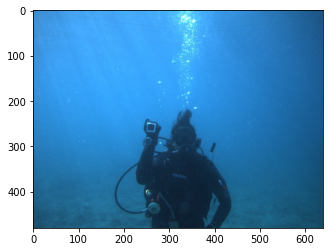

In [140]:
show_example(*data_seperator(tensor_dataset[0]))

## Data Segregation 
Creating Validation, Testing and Training Datasets

For this scenario I would like to keep the ratio of the Datasets to be:
* Validation : 15%
* Testing : 15%
* Training : 70%

As we saw the dataset is not shuffled hence we need to shuffle the dataset first and then proceed with the segregation.




In [141]:
random_seed = 42
torch.manual_seed(random_seed);

In [149]:
val_size = len(tensor_dataset)*15//100
test_size = val_size
training_size = len(tensor_dataset)-val_size - test_size
train_ds, val_ds, test_ds = random_split(tensor_dataset, [training_size, val_size, test_size])
len(train_ds), len(val_ds), len(test_ds)

(12936, 2771, 2771)

In [151]:
jovian.log_dataset(dataset_url=dataset_url, val_size=val_size, random_seed=random_seed)

[jovian] Dataset logged.
